In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

In [6]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

def generate_binary_maze(n, m, obstacle_density=0.3):
    maze = np.zeros((n, m), dtype=int)
    num_obstacles = int(n * m * obstacle_density)

    # Populate the maze with obstacles
    obstacle_positions = random.sample(range(n * m), num_obstacles)
    for pos in obstacle_positions:
        row, col = divmod(pos, m)
        maze[row, col] = 1

    return maze.tolist()

def astar_3d(points = 'point_cloud.xyz'):
    point_list = []
    with open(points, 'r') as f:
        for line in f:
            point_list.append([float(x) for x in line.split()])
    
    #sort the list by increasing y value
    point_list.sort(key=lambda x: x[1])
    
    # remove all the points that are greater than 10% of the average y value and adjust the center
    avg_y = sum([x[1] for x in point_list]) / len(point_list)
    avg_x = sum([x[0] for x in point_list]) / len(point_list)
    
    point_list = [x for x in point_list if x[1] < 1.1 * avg_y]
    #point_list = [[x[0], x[1] - avg_y] for x in point_list]
    
    # calcualate the average x value and adjust all the points to be centered around the average x value
    
    #point_list = [[x[0] - avg_x, x[1]] for x in point_list]
    
    return point_list
    
def plot_top_down(points):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.scatter([x[0] for x in points], [x[1] for x in points])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    #plt.xlim(-5, 5)
    #plt.ylim(-5, 5)
    plt.show()

def find_start_end_points(maze):
    n, m = maze.shape
    zeros = np.argwhere(maze == 0)
    start_point, end_point = random.sample(list(zeros), 2)
    return tuple(start_point), tuple(end_point)


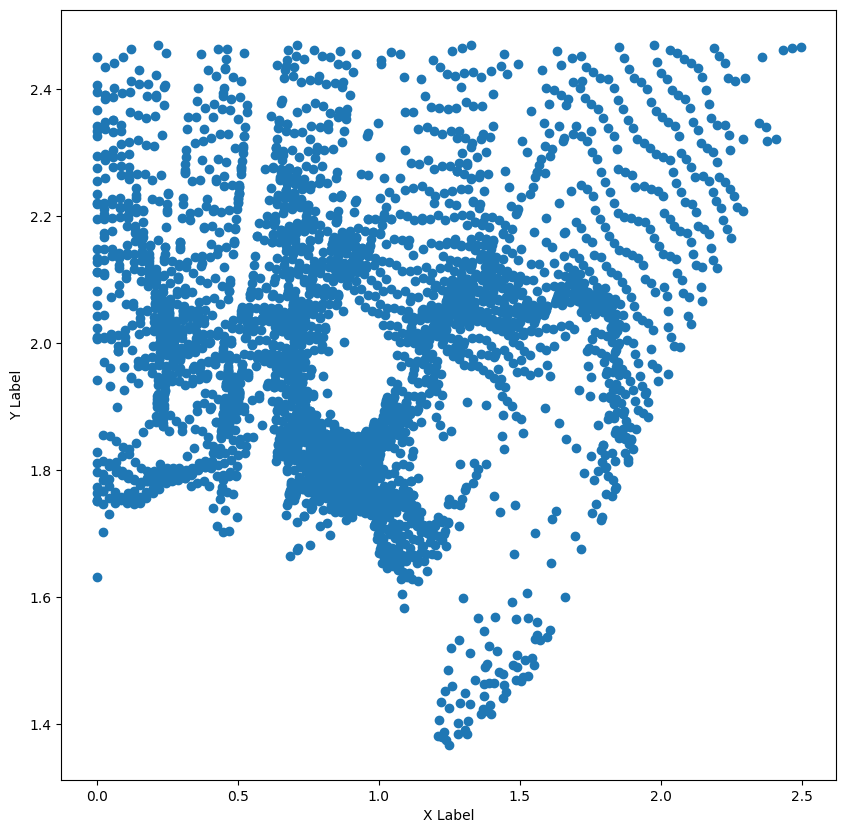

In [7]:
p = astar_3d('point_cloud.xyz')
plot_top_down(p)

2496 1104


(0.0, 5000.0)

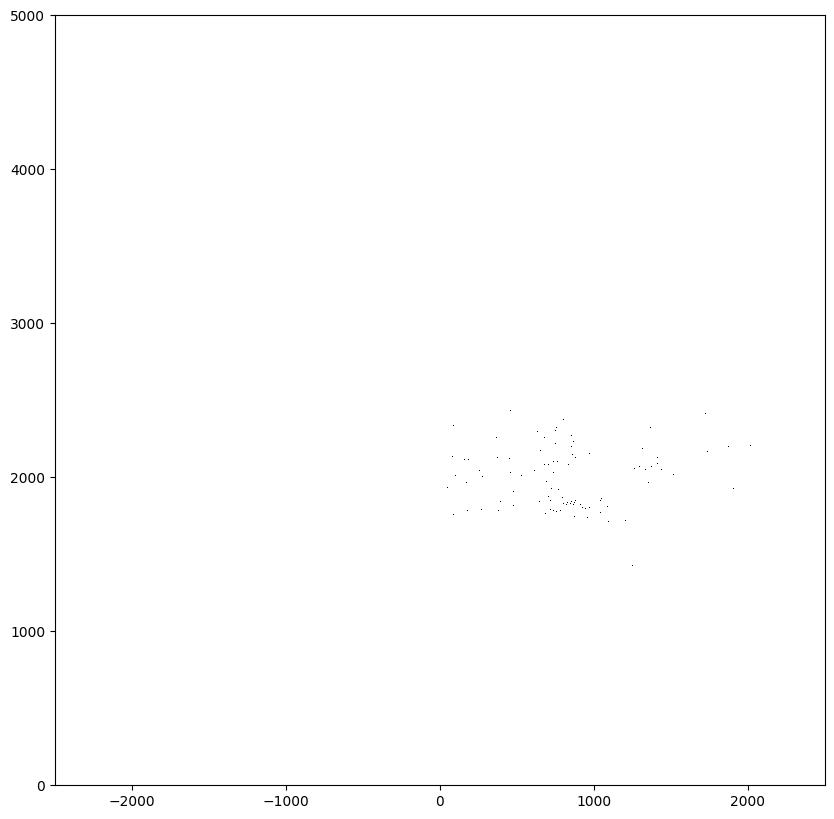

In [8]:
p = astar_3d('point_cloud.xyz')

p = np.array(p)
p = (p * 1000).astype(int)

#remove the z values
p = p[:, :2]

#print(p)

# find the range of the x values (max - min) and y values (max - min)
x_range = p[:, 0].max() - p[:, 0].min()
y_range = p[:, 1].max() - p[:, 1].min()
print(x_range, y_range)

points_x_avg = p[:, 0].mean().astype(int)
points_y_avg = p[:, 1].mean().astype(int)

#print(points_x_avg, points_y_avg)

axis_size = 5000
maze = np.zeros((axis_size, axis_size), dtype=int)

# populate the maze with the points
for point in p:
    maze[point[1], point[0]] = 1

plt.figure(figsize=(10, 10))
plt.imshow(maze, cmap='binary', interpolation='nearest')
plt.xlim(-axis_size//2, axis_size//2)
plt.ylim(0, axis_size)

[(27, 20), (26, 19), (25, 18), (24, 17), (23, 18), (22, 17), (21, 16), (20, 15), (19, 15), (18, 14), (17, 13), (16, 14), (15, 14), (14, 14), (13, 14), (12, 14)]


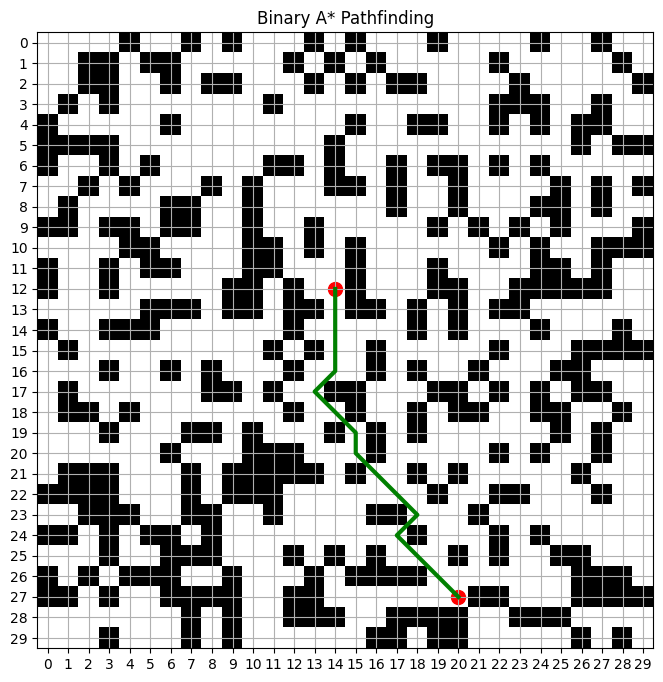

In [9]:
if __name__ == '__main__':
    maze = generate_binary_maze(30, 30, 0.35)
    
    start, end = find_start_end_points(np.array(maze))

    path = astar(maze, start, end)
    print(path)

    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='binary', interpolation='nearest')
    plt.xticks(range(len(maze[0])))
    plt.yticks(range(len(maze)))
    plt.title('Binary A* Pathfinding')
    
    plt.scatter(start[1], start[0], color='red', s=100, label='Start')
    plt.scatter(end[1], end[0], color='red', s=100, label='End')
    
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], color='green', linewidth=3, label='Path')
    plt.grid()
    plt.show()